<a href="https://colab.research.google.com/github/Elibaque/SIM_YAC_ELIANA_UPSE2023/blob/main/Ejercicio_3_clase_Explicito.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy  as np # Llamar a las bibliotecas a utilizar
import math


In [2]:
# Datos del Yacimiento
L=10000
dx=2500
Tiempo=100000
DT=1
K=50 #Permeabilidad MD
por=0.2
vis=1 # centipoise
Beta=1
CompTotal=10**(-6) #ps1-1
A=200000#ft^2

#Esquema Explicito - Resolucion

In [3]:
#Calcular Alfa con la formula respectiva
Alpha=K/(vis*por*CompTotal)
Alpha
#Calcular Eta con la formula respectiva
Eta=(Alpha*DT)/(dx**2)

In [4]:
Eta

40.0

In [5]:
#Esquema Explicito
def Presdt(P0,P1,P2,Eta):
  Pdt=P1+Eta*(P0-2*P1+P2)
  return(Pdt)
#Crear matriz que guarda los valores del esquema Explicito
Pexplicita=np.zeros((Tiempo//DT,(L//dx)+2)) #Al colocar 2 veces el // se obtiene una division exacta por ende no necesita usar math_floor

In [6]:
#Condiciones iniciales
Pyac=1000
Piz=500 #Presion Izquierda
Pder=0 #Presion derecha
Pin=np.ones((L//dx)+2) # se crea un vector (1) de acuerdo al numero de nodos
Pres=np.zeros((L//dx)+2) # se crea un vector vacio para colocar los resultados
Pin=Pin*Pyac #Vector de 1 se multiplica para la presion de yacimiento y de esta manera se llenan los datos
Pin[0]=2*Piz-Pin[1]
Pin[len(Pin)-1]=2*Pder-Pin[len(Pin)-2]

Pin

array([    0.,  1000.,  1000.,  1000.,  1000., -1000.])

In [7]:
t=DT
Pexplicita[0]=Pin
while t<Tiempo:# se encarga de ir llenando los datos de los tiempos
  for i in range(0,len(Pin)-1): # se encarga de llenar los datos del espacio
    if i==0: #Condicion inicial cuando i vale 0
      Pres[i]=2*Piz-Pin[1]
    elif i==len(Pin)-1: # Condicion, el valor final del numero de nodos del vector se considerara menos un nodo de acuerdo a python
      Pres[i]=2*Pder-Pin[len(Pin)-2]
    else:
      Pres[i]=Presdt(Pin[i-1],Pin[i],Pin[i+1],Eta)# Se llama a la funcion
  Pexplicita[t//DT]=Pres # Con esta condicion se obtiene el indice de la fila
  t=t+DT# se cambia la condicion para calcular la siguiente fila y seguir con el ciclo
  Pin=Pres

<ipython-input-5-184ba68d2609>:3: RuntimeWarning: overflow encountered in double_scalars
  Pdt=P1+Eta*(P0-2*P1+P2)
<ipython-input-5-184ba68d2609>:3: RuntimeWarning: invalid value encountered in double_scalars
  Pdt=P1+Eta*(P0-2*P1+P2)


In [11]:
Pexplicita


array([[ 0.00000000e+00,  1.00000000e+03,  1.00000000e+03,
         1.00000000e+03,  1.00000000e+03, -1.00000000e+03],
       [ 0.00000000e+00, -3.90000000e+04,  1.00000000e+03,
         1.00000000e+03, -7.90000000e+04,  0.00000000e+00],
       [ 4.00000000e+04,  4.72100000e+06,  1.88801000e+08,
         7.54880100e+09,  3.01958281e+11,  0.00000000e+00],
       ...,
       [            nan,             nan,             nan,
                    nan,             nan,  0.00000000e+00],
       [            nan,             nan,             nan,
                    nan,             nan,  0.00000000e+00],
       [            nan,             nan,             nan,
                    nan,             nan,  0.00000000e+00]])

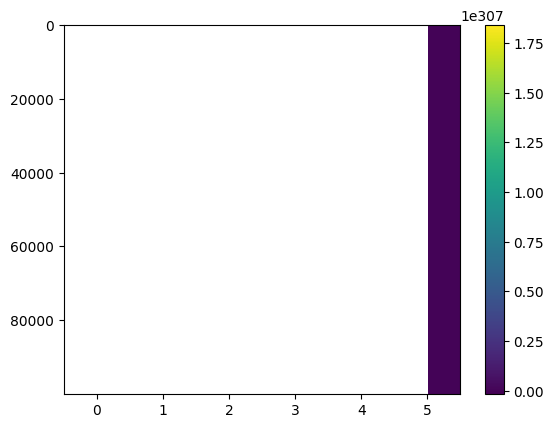

In [12]:
import matplotlib.pyplot as plt

imgplot = plt.imshow(Pexplicita,aspect='auto')
plt.colorbar()
